<a href="https://colab.research.google.com/github/rufusclieve/Gold-Price-Prediction-Model/blob/main/Project_3_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# read the dataset
data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## Full form

1. SPX = Represents how well the top 500 companies in the US are doing in the stock Market.
2. GLD - Like a digital gold bar you can buy and sell.
3. USO - Like a digital barrel of oil you can buy and sell.
4. SLV - Price of Silver
5. EUR/USD - currency pair of euro and us dollar
(Represents  how many us dollar are needed to buy one euro).


In [5]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
data.shape

(2290, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking for missing values
data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the correlation matrix, excluding non-numeric columns
correlation = data.corr(numeric_only=True)

In [13]:
correlation = data.corr()

<Axes: >

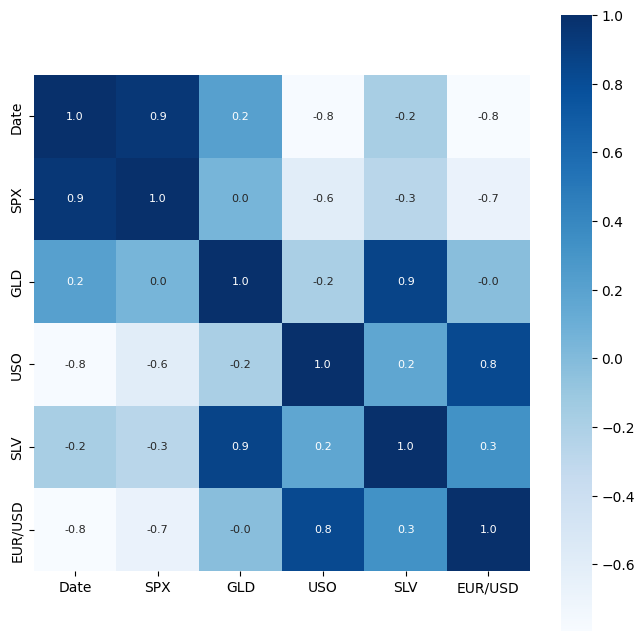

In [14]:
# constructing heatMap to understand the correlation btw them
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# checking how gold is correlated with other columns
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-17-018832f92469>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

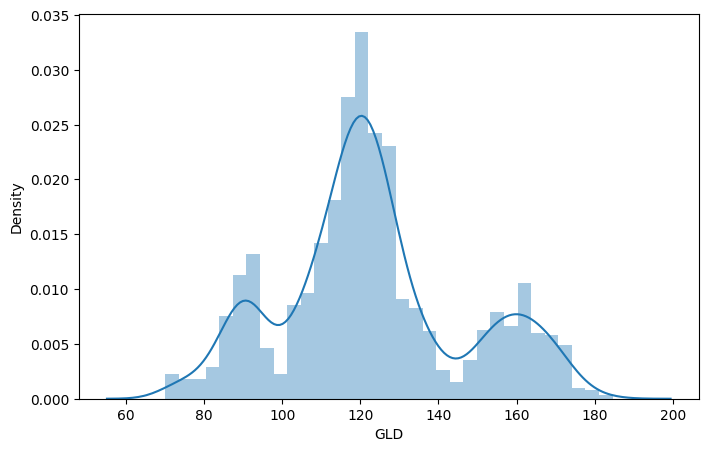

In [17]:
# lets plot a distplot and check how gold is distributed
plt.figure(figsize=(8,5))
sns.distplot(data['GLD'])

In [18]:
# now let seperate the features and targets
x= data.drop(['Date','GLD'], axis = 1)
y = data['GLD']

In [19]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
# splitting the dataset to test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [23]:
# model Training
reg = RandomForestRegressor(n_estimators=100)

In [26]:
# training our model
reg.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
# Model Evaluation Predicting on test dataset

test_data_prediction = reg.predict(x_test)


In [28]:
print(test_data_prediction)

[168.45609928  81.9257999  116.26059985 127.60130039 120.52390136
 154.56009764 150.49819851 126.20299979 117.40039865 125.80790112
 116.87920079 171.39550124 142.36649907 167.56199825 115.13870008
 117.71930055 137.8203032  170.13900092 159.76110241 158.14549933
 154.85979987 125.45440021 176.18139979 157.15710283 125.23050025
  93.8479998   77.52500023 120.48740004 119.10759924 167.42929956
  88.12780125 125.47030025  91.20420092 117.74490023 121.07979917
 135.82670066 115.6329014  115.40290062 147.07769989 107.21200067
 104.45100255  87.27939802 126.54540037 118.17419976 153.70829943
 119.67890025 108.49699995 108.18389814  93.18270048 127.05599786
  75.25520031 113.61609898 121.50050005 111.34899897 118.85459917
 120.78729893 158.93890067 167.54050108 147.18679683  86.06929902
  94.19580045  86.83249907  90.54350015 118.85970077 126.43160063
 127.39039996 170.27530039 122.27489962 117.43859898  98.28550034
 168.66030183 142.86219781 131.70890207 121.09710237 121.19389947
 119.88070

In [29]:
# Metrics
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)
#

R squared error :  0.9894760978026532


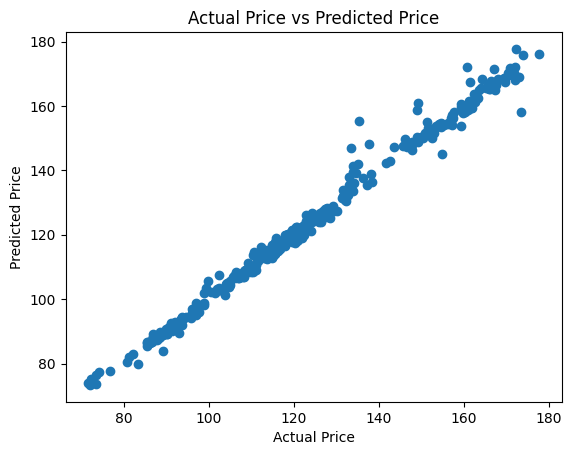

In [32]:
# visual representation
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()